In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(41)

# Bayesian inference 
 We will use the Monte Carlo sampling technique to demonstrate Bayesian inference in a marketing coupon A/B test. The monte carlo sampling is also known as the approximate Baysian computation i.e from simulating data instead of analytical solution.  

## Problem statement
Marketing is interested in running a 17% coupon to entice customers to sign up for email.   
Conservatively, marketing test the new promotion on 100 visitors and found 30 visitors have signed up.   

Given 100 customers, how probable that the number of people that had signed up is 30 people?  

### Non-informative prior
Let's assume all sign-ups rate from 0%-100% have equal chance of happening.  
Consequently, we use the uniform distribution as our prior. The uniform distribution assign the same likelihood to all possible sign up rates, i.e 0%-100% . 

### Generative model
We use binomial model as our generative model. Using the binomial model we sample from our uniform prior and keep only the sign up rates for which the evidence is present.  


In [4]:
#simulation parameters and conditions
n_draws=100000
n_visitor= 100
n_signup=30

# uniform sign-up rate
prior= pd.Series(np.random.uniform(0,1,n_draws))

# binomial model
def binomial(prob,n_size):
    return( np.random.binomial(n_size, prob)) #given number of trials and the probability of successes, return the number of signups 

# filter the prior for all outcomes where our evidence is present
posterior=[]
for p in prior:
    n=binomial(p,n_visitor)
    if n==n_signup: # if n is equal to marketing signups, then append as posterior result
        posterior.append(p)

The blue histogram is the uniformly distributed prior. The orange histogram is the sign up rates for which 30 out of 100 visitors are obtained. 

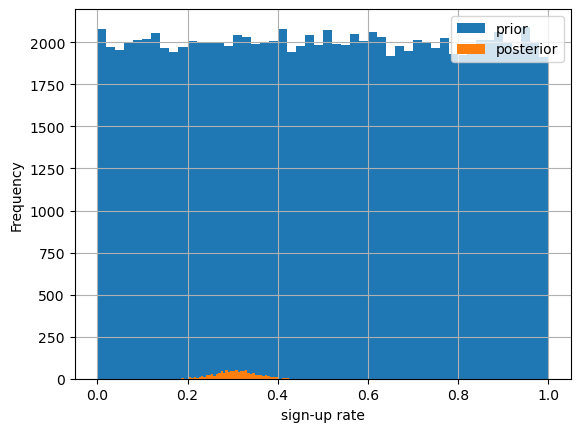

In [5]:
fig,ax=plt.subplots()
prior.hist(bins=50, ax=ax, label='prior') 
ax.set_xlabel('sign-up rate %')
ax.set_ylabel('Frequency')
plt.hist(posterior,bins=50, label='posterior')
plt.xlabel('sign-up rate')
plt.legend()


In [20]:
print(f'Total number of sample that had 30 out of 100 signs up out of {n_draws} is {len(posterior)}')
print(f'Mean of posterior { np.mean(posterior):0.3f}, median of posterior {np.median(posterior):0.3f} ')
print (f'95% credible level {np.quantile(posterior, 0.025):0.3f} - {np.quantile(posterior, 0.975):0.3f}')

###new line
##more new line
#I'm not sure if this next statement is true. 
#print(f'Given the evidence, the robability of seing a sign-up rate better than 0.30 is {sum(map(lambda x: x>0.3 , posterior))/len(posterior):0.3f} ')

Total number of sample that had 30 out of 100 signs up out of 100000 is 2046
Mean of posterior 0.297, median of posterior 0.297 
95% credible level 0.217 - 0.383


For 100 visitor, at 95% credible level the number of sign up visitors is between 26.75 - 43.52499999999998


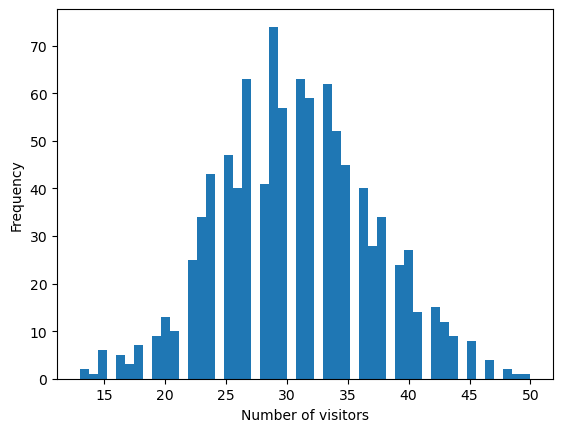

In [7]:
#  number of sign ups in 100 visitors given the sign up rate of our posterior
signups = list()
for p in posterior:
    signups.append(np.random.binomial(n_visitor, p))

plt.hist(signups, bins=50)
plt.xlabel ('Number of visitors')
plt.ylabel ('Frequency')
print(f'For {n_visitor} visitor, at 95% credible level the number of sign up visitors is between {np.quantile(signups,0.25)} - {np.quantile(signups,0.975)}')

### Maximum likelihood sign-up rate.  

We fit a gaussian-like profile over the posterios sign up rates histogram to obtain the position of maximum likelihood.  

The the most probabable rate 0.307
Number customer that sign ups at 0.307 rate is 24


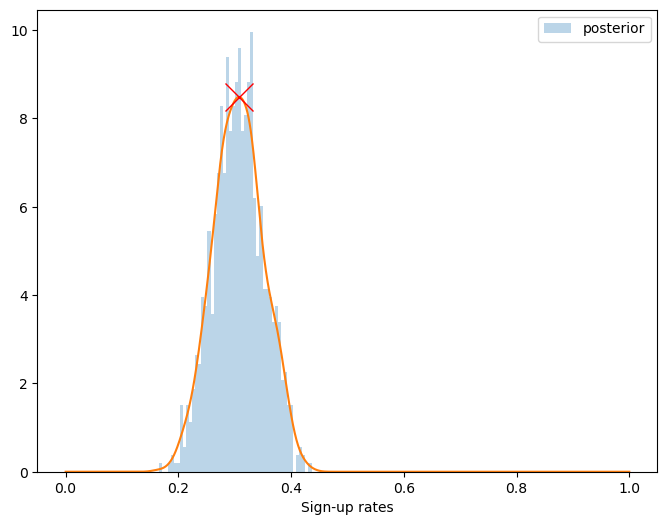

In [8]:
from scipy import stats
kde=stats.gaussian_kde(posterior) #obtain the gaussian profile for posterior
x_axis = np.linspace(0, 1, 1000)
y=kde(x_axis)
print(f'The the most probabable rate {x_axis[y.argmax()]:0.3f}')
print(f'Number customer that sign ups at {x_axis[y.argmax()]:0.3f} rate is {np.random.binomial(n_visitor, x_axis[y.argmax()])}')

#plot figure 
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel ('Sign-up rates')
ax.hist(posterior, density=True, bins=50, alpha=0.3, label='posterior')
ax.plot(x_axis, kde(x_axis))
ax.plot(x_axis[y.argmax()],y.max(), marker='x', markersize=20,markeredgecolor='red')


plt.legend()


### Updating posterior (informative prior)
Marketing do not think that the prior is uniform. Infact marketing believes that the sign up rate is most likely between 5%-20%.  
We can use the Beta distribution to model the sign up rate whereby 5%-20% has a greater probability than other sign up rate.   

The beta distribution is analogous to the binomial distribution equation. Instead of returning the number of successes as in the binomial distribution equation, the beta distribution gives us the probability density function of the successes. 

The beta distribution takes two parameters, $\alpha$ and $\beta$.  

$\alpha$ is analogous to $p$ (success proportion), and $\beta$ is analogous to $q$ (failure proportion). Such that if $p$ is greater than $q$, the number of successes is greater than the number of failures. 
The sign-up rate is less than 50% ,i.e  lean towards failure, thus we let $\alpha<\beta$. 


Here's beta calculator to get an approximate distribution https://homepage.divms.uiowa.edu/~mbognar/applets/beta.html


Text(0, 0.5, 'frequency')

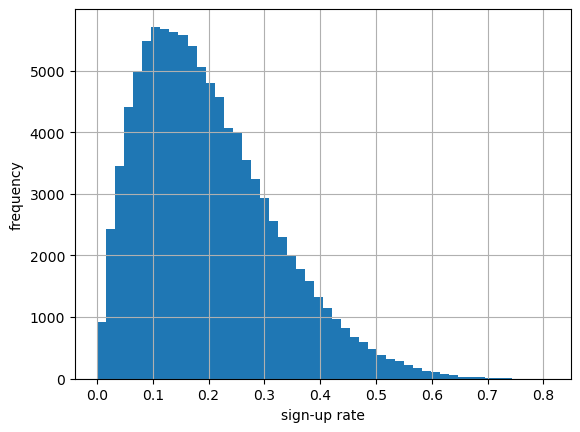

In [9]:
alpha=2 # Parameter choosen from trial and error using the beta calculator
beta=8 # Parameter choosen from trial and error using the beta calculator
beta_prior=pd.Series(np.random.beta(alpha,beta, n_draws))

#graph
fig,ax=plt.subplots()
beta_prior.hist(bins=50, ax=ax, label='prior') 
ax.set_xlabel('sign-up rate')
ax.set_ylabel('frequency')


Without relying on the calculator, we can perform the same trial and error with Scipy.stats Beta package. Below is the beta distribution along with its histogram. 

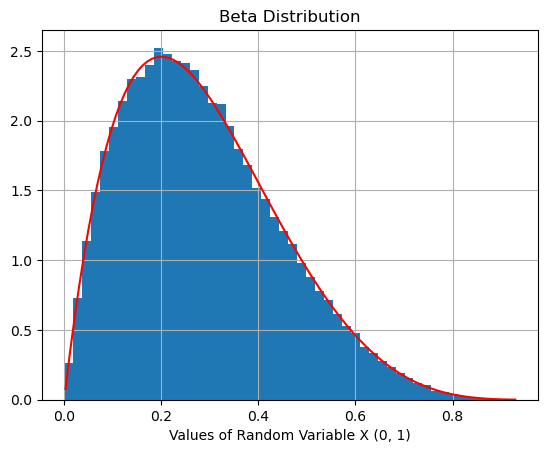

In [10]:
from scipy.stats import beta

a, b = 2, 5 #change this until the pdf follows our prior criteria
beta_prior=pd.Series(np.random.beta(a,b, n_draws))
x = np.linspace(beta.ppf(0.0001, a, b),beta.ppf(0.99999, a, b), 100)

fig,ax=plt.subplots()
beta_prior.hist(bins=50, ax=ax, label='prior', density=True) 
plt.plot(x, beta.pdf(x, a, b), 'r-')
plt.title('Beta Distribution')
plt.xlabel('Values of Random Variable X (0, 1)')

plt.show()


Then we repeat the sampling process again.


Total evidence 2046
Mean of posterior 0.297, median of posterior 0.297 
95% credible level (confidence level) 0.217 - 0.383
Probability of seing a rate 0.3% or more extreme is 0.476 
The the most probabable rate 0.310
Number customer that would signed up at the most probable rate: 0.310 is 37


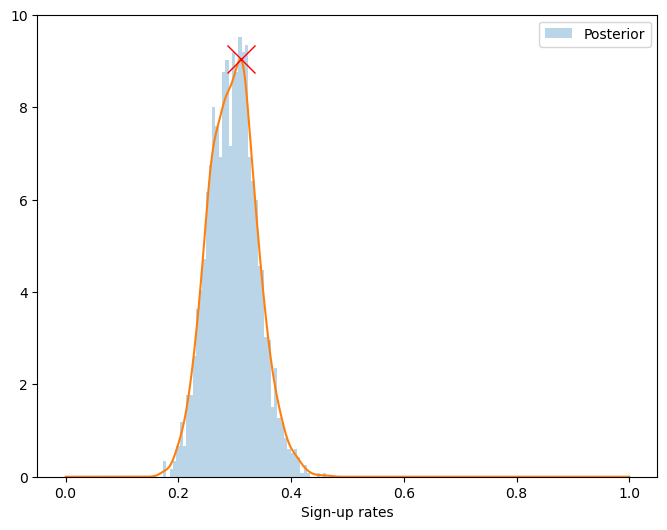

In [11]:
def binomial(prob,n_size):
    return( np.random.binomial(n_size, prob))

# filter the prior for all outcomes where our evidence is present
posterior=[]
for p in beta_prior:
    n=binomial(p,n_visitor)
    if n==n_signup: #posterior
        posterior.append(p)

kde=stats.gaussian_kde(posterior) #obtain the gaussian profile for posterior
x_axis = np.linspace(0, 1, 1000)
y=kde(x_axis)

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel ('Sign-up rates')
ax.hist(posterior, density=True, bins=50, alpha=0.3, label='Posterior')
ax.plot(x_axis, kde(x_axis))
ax.plot(x_axis[y.argmax()],y.max(), marker='x', markersize=20,markeredgecolor='red')
plt.legend()

print(f'Total evidence {len(posterior)}')
print(f'Mean of posterior { np.mean(posterior):0.3f}, median of posterior {np.median(posterior):0.3f} ')
print (f'95% credible level (confidence level) {np.quantile(posterior, 0.025):0.3f} - {np.quantile(posterior, 0.975):0.3f}')
print(f'Probability of seing a rate 0.3% or more extreme is {sum(map(lambda x: x>0.3 , posterior))/len(posterior):0.3f} ')
print(f'The the most probabable rate {x_axis[y.argmax()]:0.3f}')
print(f'Number customer that would signed up at the most probable rate: {x_axis[y.argmax()]:0.3f} is {np.random.binomial(n_visitor, x_axis[y.argmax()])}')

### Site Testing A/B 

Bayesian inference application in A/B testing is identical.     

For each A and B test, we can sample from a uniform distribution (we will assume non informative prior). We then compare the two posteriors. 





In [12]:

n_sim=10000 
n_traffic=100 #  imagine this is the traffic to each test

def uniform_sampling(n_signup, n_traffic):

    prior= pd.Series(np.random.uniform(0,1,n_sim)) # we assume that all sign ups rates are equally probably 

    posterior =[]
    
    for p in prior:
        n=binomial(p,n_traffic) #generate test A or test B where p is the number of converted visitor in testA or Test B
        
        if n==n_signup:
            posterior.append(p)

    return posterior

# let test A have 20/100 people sign up, whch is something I make up to ensure that our variant wins. 
# let test B have 30/100 people sign up, whch is something I make up to ensure that our variant wins. 

posterior_a=uniform_sampling(20,n_traffic)
posterior_b=uniform_sampling(30,n_traffic) 

print(f'Out of {n_sim} days, the number of days where 20 out of 100 visitor sign up is: {len(posterior_a)}, and 30 out of 100 visitor sign up is {len(posterior_b)}')


Out of 10000 days, the number of days where 20 out of 100 visitor sign up is: 105, and 30 out of 100 visitor sign up is 95


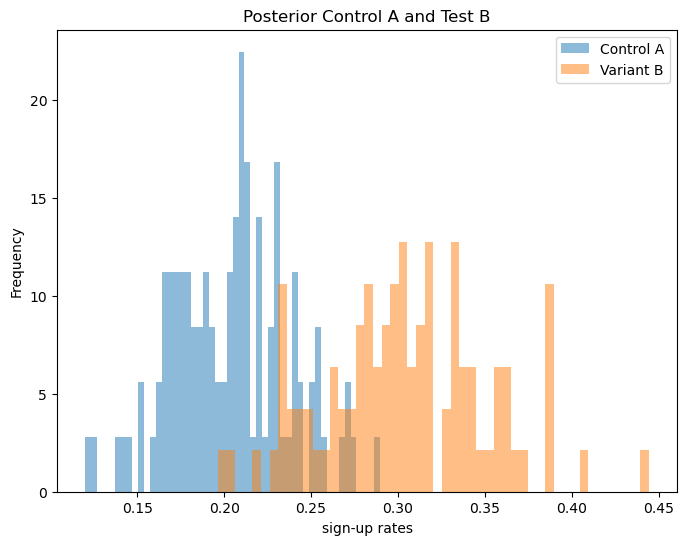

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
plt.title ('Posterior Control A and Test B')
plt.hist(posterior_a, bins=50, alpha=0.5, density=True, label='Control A')
plt.hist(posterior_b, bins=50, alpha=0.5, density=True, label='Variant B')
plt.xlabel('sign-up rates')
plt.ylabel('Frequency')
plt.legend()

In [14]:
print(f'the mean of posterior in Variant B: {np.mean(posterior_b):0.4f}')
print(f'the mean of posterior in Variant A: {np.mean(posterior_a):0.4f}')

the mean of posterior in Variant B: 0.3042
the mean of posterior in Variant A: 0.2035


The the most probabable difference is : 0.085
95% credible level (confidence level) 0.004 to 0.205
The number of times test B < test A in subscribers is 2. 
The probability of test B < test A subscribers 0.021. 


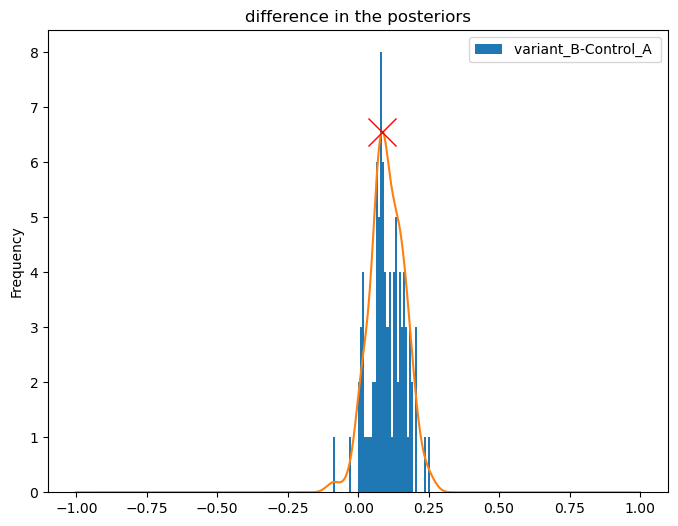

In [15]:
# get difference between posterior

difference =[]

zip_object=zip(posterior_a,posterior_b)
for a,b in zip_object:
    difference.append(b-a)

kde_diff=stats.gaussian_kde(difference)
x_axis=np.linspace(-1,1,1000)
y=kde_diff(x_axis)
print(f'The the most probabable difference is : {x_axis[y.argmax()]:0.3f}')
print (f'95% credible level (confidence level) {np.quantile(difference, 0.025):0.3f} to {np.quantile(difference, 0.975):0.3f}')
print(f'The number of times test B < test A in subscribers is {sum(map(lambda x: x<0 , difference))}. ')
print(f'The probability of test B < test A subscribers {sum(map(lambda x: x<0 , difference))/len(difference) :0.3f}. ')

fig,ax=plt.subplots(figsize=(8,6))
plt.ylabel('Frequency')
plt.hist(difference, bins=50, label='variant_B-Control_A ')
plt.title('difference in the posteriors')
ax.plot(x_axis,kde_diff(x_axis))
ax.plot(x_axis[y.argmax()],y.max(), marker='x', markersize=20, markeredgecolor='red')
plt.legend()

Expected loss calculation for a single day where traffic was 100 into test a and 100 in test B

In [16]:
visit_control=n_traffic
orders_control=20

visit_var = n_traffic
orders_var =30

cvr_control=orders_control/visit_control
cvr_var=orders_var/visit_var


print(f'cvr_control={cvr_control:0.4f}, cvr_var: {cvr_var:0.4f}')

cvr_control=0.2000, cvr_var: 0.3000


In [17]:
n_mc=n_sim

alpha_c=orders_control
beta_c=visit_control-orders_control
control_sample=np.random.beta(alpha_c,beta_c,size=n_mc)

alpha_v=orders_var
beta_v=visit_var-orders_var
var_sample=np.random.beta(alpha_v,beta_v,size=n_mc)

print(f'control_sample={control_sample.mean():0.4f}, var_sample: {var_sample.mean():0.4f}')

control_sample=0.2002, var_sample: 0.2999


calculate the expected loss from control AND variant groups.  

calculation for expected loss control:  variation_sample - control_sample

when control_sample >variation sample the above equation will return negative expected loss. 
a negative value is not an expected loss in the control group so we will set negatives as 0. 


calculation for expected loss variation:  control_sample -variation_sample
when varation_sample > control_sample, the above equation will return negative expected loss
a negative value is not an expected in the variation group so we wills set the negatives as 0. 



In [18]:

expected_loss_c=[]
expected_loss_v=[]

for i in range(n_mc):
    diff=var_sample[i]-control_sample[i]
    if diff<0:
        expected_loss_c.append(0)
        expected_loss_v.append(np.absolute(diff))
    else:
        expected_loss_c.append(diff)
        expected_loss_v.append(0)

print(f'expected loss for control {np.mean(expected_loss_c)*100:0.4f} ,expected_loss_v={np.mean(expected_loss_v)*100:0.4f} ')

expected loss for control 10.1052 ,expected_loss_v=0.1366 


In [19]:
print(f'expected loss for control {np.mean(expected_loss_c)*100:0.4f} ,expected_loss_v={np.mean(expected_loss_v)*100:0.4f} ')

expected loss for control 10.1052 ,expected_loss_v=0.1366 
